# Part I - (Dataset Exploration Title)
## by (Oluwaseyi OGUNLANA )

## Introduction
Prosper is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. For this project, we are using the data from the Posper to analyse it and trying to find the pattern in the Prosper data. This data set contains 113,937 loans with 81 variables on each loan.

We are trying to answer these questions

> what is the major purpose of getting loan from prosper?

> Is it only people that are working that can get loan from Prosper?


> What affects the borrower’s APR?

## Preliminary Wrangling
Inorder to investigate the dataset, I cleaned the data by doing the flowwing:
  i.  getting the full name of abbreviated BorrowerState.

  ii. EmploymentStatus Not available was replaced with employed as it has values for occupations

 iii. Income Range Not employed was  replaced with $0 

In [81]:
#import necesaary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
base_color = sb.color_palette()[0]

In [82]:
#reading the data and checking the first 5 rows in the data
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

This data set contains 113,937 loans with 81 variables on each loan. Only the columns that are related to  the amount of loan, dates, rates and other charactrestics about the borrowers for exploration of the loan dataset are selected. Fifteen(15) columns will be selected to investigate. 

source:https://www.kaggle.com/code/omarelsherif010/loan-data-visualization-data-analysis-easy?scriptVersionId=49667904

In [83]:
#subseting the loan dataframe to the 15 columns
needed_cols = ['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR','BorrowerRate',
               'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
               'BorrowerState', 'Occupation', 'EmploymentStatus', 'AmountDelinquent','IncomeRange',
               'StatedMonthlyIncome','LoanCurrentDaysDelinquent','LoanOriginalAmount', 'LoanOriginationDate', 
                'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors']

loan_df = loan_df[needed_cols]

In [84]:
#ckecking the shape of the new loan dataframe
loan_df.shape

(113937, 22)

In [85]:
#first first rows of the new loan dataframe
loan_df.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,0,CO,Other,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12 00:00:00,330.43,-133.18,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,CO,Professional,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03 00:00:00,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,0,GA,Other,Not available,NaN,Not displayed,2083.333333,0,3001,2007-01-17 00:00:00,123.32,-24.20,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,GA,Skilled Labor,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01 00:00:00,321.45,-108.01,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,MN,Executive,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20 00:00:00,563.97,-60.27,20


# EXPLORATORY DATA ANALYSIS

In [86]:
#checking dataframe infomation
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   ProsperRating (Alpha)      84853 non-null   object 
 8   ProsperScore               84853 non-null   float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  AmountDelinquent           10

# observations

1. There are missing values in the dataframe. The columns that contain missing values are:
    i   ClosedDate 
    ii  ProsperRating (Alpha) 
    iii ProsperScore 
    iv. BorrowerState 
    v.  EmploymentStatus           
    vi  Occupation 
    vii AmountDelinquent
    
2. The following columns- ListingCreationDate, ClosedDate,  LoanOriginationDate are of object datatype instead of date

3. The word in parenthesis for "ProsperRating (Alpha)" and "ListingCategory (numeric)" should removed for ease access of the column names

4. The 'ProsperRating (Alpha)' and 'IncomeRange' columns should be changed to ordinal categorical datatype and
    'ListingCategory (numeric)',  'LoanStatus', 'BorrowerState', 'Occupation', 'EmploymentStatus' should be changed to norminal categorical datatype
    

In [87]:
loan_df.duplicated().sum()

0

In [88]:
#desciptive statistics for quantitative columns
loan_df.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,LP_ServiceFees,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,113937.000000,106315.000000,1.139370e+05,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,5.950067,2.774209,984.507059,5.608026e+03,152.816539,8337.01385,272.475783,-54.725641,80.475228
std,10.436212,0.080364,0.074818,0.074516,2.376501,3.996797,7158.270157,7.478497e+03,466.320254,6245.80058,192.697812,60.675425,103.239020
min,12.000000,0.006530,0.000000,-0.010000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,-664.870000,1.000000
25%,36.000000,0.156290,0.134000,0.124200,4.000000,1.000000,0.000000,3.200333e+03,0.000000,4000.00000,131.620000,-73.180000,2.000000
50%,36.000000,0.209760,0.184000,0.173000,6.000000,1.000000,0.000000,4.666667e+03,0.000000,6500.00000,217.740000,-34.440000,44.000000
75%,36.000000,0.283810,0.250000,0.240000,8.000000,3.000000,0.000000,6.825000e+03,0.000000,12000.00000,371.580000,-13.920000,115.000000
max,60.000000,0.512290,0.497500,0.492500,11.000000,20.000000,463881.000000,1.750003e+06,2704.000000,35000.00000,2251.510000,32.060000,1189.000000


In [89]:
#descriptive statistics for qualitative columns
loan_df.describe(exclude=np.number)

,ListingCreationDate,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,LoanOriginationDate
count,113937,113937,55089,84853,108422,110349,111682,113937,113937
unique,113064,12,2802,7,51,67,8,8,1873
top,2013-10-02 17:20:16.550000000,Current,2014-03-04 00:00:00,C,CA,Other,Employed,"$25,000-49,999",2014-01-22 00:00:00
freq,6,56576,105,18345,14717,28617,67322,32192,491


# observations

1. The maximum loan term is 60 months i.e 5years

2. The masximun ProsperScore is 11 meaning there is irregularity in the data as the maximum number should be 10

3. The Most frequent LoanStatus is Current

4. Most Frequent Income range $25,000-49,999

5. There is no duplicate row in the dataframe

In [90]:
round((loan_df.isna().sum()/loan_df.shape[0])*100, 2)

ListingCreationDate           0.00
Term                          0.00
LoanStatus                    0.00
ClosedDate                   51.65
BorrowerAPR                   0.02
BorrowerRate                  0.00
LenderYield                   0.00
ProsperRating (Alpha)        25.53
ProsperScore                 25.53
ListingCategory (numeric)     0.00
BorrowerState                 4.84
Occupation                    3.15
EmploymentStatus              1.98
AmountDelinquent              6.69
IncomeRange                   0.00
StatedMonthlyIncome           0.00
LoanCurrentDaysDelinquent     0.00
LoanOriginalAmount            0.00
LoanOriginationDate           0.00
MonthlyLoanPayment            0.00
LP_ServiceFees                0.00
Investors                     0.00
dtype: float64

In [91]:
object_cols = loan_df.select_dtypes(exclude=np.number)
object_cols.columns

Index(['ListingCreationDate', 'LoanStatus', 'ClosedDate',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'IncomeRange', 'LoanOriginationDate'],
      dtype='object')

In [92]:
for col in object_cols.drop(['ListingCreationDate','ClosedDate','LoanOriginationDate'], axis=1).columns:
    print(col)
    print(object_cols[col].value_counts())
    print('---------------------------')

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64
---------------------------
ProsperRating (Alpha)
C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64
---------------------------
BorrowerState
CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      

In [93]:
loan_df.groupby(["EmploymentStatus",'Occupation'])['EmploymentStatus'].count().unstack('Occupation').T

EmploymentStatus,Employed,Full-time,Not available,Not employed,Other,Part-time,Retired,Self-employed
Occupation,,,,,,,,
Accountant/CPA,2166.0,782.0,114.0,NaN,1.0,12.0,NaN,158.0
Administrative Assistant,2321.0,1104.0,179.0,NaN,1.0,51.0,NaN,32.0
Analyst,2402.0,999.0,155.0,1.0,NaN,8.0,NaN,37.0
Architect,116.0,68.0,14.0,NaN,NaN,NaN,NaN,15.0
Attorney,668.0,218.0,31.0,NaN,NaN,1.0,NaN,128.0
Biologist,82.0,37.0,3.0,NaN,NaN,NaN,NaN,3.0
Bus Driver,229.0,61.0,9.0,NaN,NaN,13.0,NaN,4.0
Car Dealer,111.0,35.0,11.0,NaN,NaN,2.0,1.0,20.0
Chemist,92.0,48.0,5.0,NaN,NaN,NaN,NaN,NaN


In [94]:
loan_df.groupby(["EmploymentStatus",'IncomeRange'])['EmploymentStatus'].count().unstack('IncomeRange').T

EmploymentStatus,Employed,Full-time,Not available,Not employed,Other,Part-time,Retired,Self-employed
IncomeRange,,,,,,,,
$0,10.0,290.0,NaN,11.0,NaN,46.0,7.0,257.0
"$1-24,999",2652.0,2006.0,NaN,9.0,947.0,717.0,289.0,654.0
"$100,000+",12953.0,2990.0,NaN,1.0,128.0,4.0,10.0,1251.0
"$25,000-49,999",18368.0,9865.0,NaN,4.0,1615.0,260.0,330.0,1750.0
"$50,000-74,999",20958.0,7624.0,NaN,NaN,881.0,37.0,133.0,1417.0
"$75,000-99,999",12381.0,3484.0,NaN,NaN,235.0,10.0,25.0,781.0
Not displayed,NaN,96.0,5347.0,4.0,NaN,14.0,1.0,24.0
Not employed,NaN,NaN,NaN,806.0,NaN,NaN,NaN,NaN


# observations

1. Values in BorrowerState are abbreviated and should be in full for better understanding of the city name

2. Food Service Management and Food Service are the same thing ,  Food Service will be replaced with Food Service Management

3. EmploymentStatus Not available should be replaced with employed as it has values for occupations

4. Income Range Not employed should be eplaced with $0

# Data Cleaning

1. replacing EmploymentStatus Not available with 'Employed'

In [95]:
loan_df.replace({'EmploymentStatus':{'Not available':'Employed'}}, inplace =True)

In [96]:
loan_df['EmploymentStatus'].value_counts()

Employed         72669
Full-time        26355
Self-employed     6134
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

## replacing Occupation - Food Service with Food Service Management

In [97]:
loan_df.replace({'Occupation':{'Food Service':'Food Service Management'}}, inplace =True)

## handling missng data

In [98]:
#fill AmountDelinquent  missing values with 0 and other categorical columns with N/A
loan_df['AmountDelinquent'].fillna(0, inplace=True)
loan_df['BorrowerAPR'].fillna(loan_df['BorrowerAPR'].mean(), inplace=True)
loan_df.fillna('N/A', inplace=True)

In [99]:
loan_df.isna().sum()

ListingCreationDate          0
Term                         0
LoanStatus                   0
ClosedDate                   0
BorrowerAPR                  0
BorrowerRate                 0
LenderYield                  0
ProsperRating (Alpha)        0
ProsperScore                 0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
AmountDelinquent             0
IncomeRange                  0
StatedMonthlyIncome          0
LoanCurrentDaysDelinquent    0
LoanOriginalAmount           0
LoanOriginationDate          0
MonthlyLoanPayment           0
LP_ServiceFees               0
Investors                    0
dtype: int64

## renaming ProsperRating (Alpha) and ListingCategory (numeric) columns

In [100]:
#removing words in parenthesis from ProsperRating (Alpha) and ListingCategory (numeric)
loan_df.rename(columns = {"ProsperRating (Alpha)":"ProsperRating","ListingCategory (numeric)":"ListingCategory"},
               inplace=True)

In [101]:
loan_df.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating',
       'ProsperScore', 'ListingCategory', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'AmountDelinquent', 'IncomeRange',
       'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment',
       'LP_ServiceFees', 'Investors'],
      dtype='object')

## rename income Range Not employed should be eplaced with $0 

In [102]:
print(loan_df['IncomeRange'].unique())


['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' 'Not employed' '$0']


In [103]:
loan_df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [104]:
loan_df.replace({'IncomeRange':{'Not employed':'$0'}}, inplace =True)

In [105]:
loan_df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
$0                 1427
Name: IncomeRange, dtype: int64

## changing state abbrevated name to corresponding full name

source : https://gist.github.com/rogerallen/1583593

In [106]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [107]:
abbrev_to_us_state

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming',
 'DC': 'District of Columbia

In [108]:
loan_df['BorrowerState'] = loan_df['BorrowerState'].map(abbrev_to_us_state)

In [109]:
loan_df['BorrowerState'].head()

0     Colorado
1     Colorado
2      Georgia
3      Georgia
4    Minnesota
Name: BorrowerState, dtype: object

In [110]:
listing_category = { 0:"Not Available", 1 : "Debt Consolidation", 2 :"Home Improvement", 3 : "Business",
                    4 : "Personal Loan", 5 : "Student Use", 6 :"Auto", 7: "Other", 8 :"Baby&Adoption", 
                    9 :"Boat", 10 : "Cosmetic Procedure", 11 :"Engagement Ring",12 : "Green Loans",
                    13 : "Household Expenses", 14 : "Large Purchases", 15 :"Medical/Dental",
                    16 : "Motorcycle", 17:"RV", 18 :"Taxes", 19 :"Vacation", 20: "Wedding Loans"}

loan_df['ListingCategory'] = loan_df['ListingCategory'].map(listing_category)

## changing necessary columns datatype 

In [111]:
#creating list and dictionary for columns that datatypes needs to be changed
to_date = ['ListingCreationDate', 'ClosedDate',  'LoanOriginationDate']

ordinal = {'ProsperRating': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0']}

nominal = ['ListingCategory',  'LoanStatus', 'BorrowerState', 'Occupation', 'EmploymentStatus']
              

In [112]:
ordinal['ProsperRating']

['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']

changing columns to date datatypes

In [113]:
#create a function to handle the change of column datatype
def change_data_type(to, df, cols, ordinal=False,  categories={}):
    if to == 'date':
        for col in cols:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    elif to == 'cat' and ordinal == True:
        for col in list(cols.keys()):
            df[col] = pd.Categorical(df[col], ordered=True, categories= categories[col])
    elif to == 'cat' and ordinal == False:
        for col in cols:
            df[col] = pd.Categorical(df[col])

In [114]:
loan_df.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,N/A,N/A,Not Available,Colorado,Other,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12 00:00:00,330.43,-133.18,258
1,2014-02-27 08:28:07.900000000,36,Current,N/A,0.12016,0.0920,0.0820,A,7.0,Home Improvement,Colorado,Professional,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03 00:00:00,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,N/A,N/A,Not Available,Georgia,Other,Employed,0.0,Not displayed,2083.333333,0,3001,2007-01-17 00:00:00,123.32,-24.20,41
3,2012-10-22 11:02:35.010000000,36,Current,N/A,0.12528,0.0974,0.0874,A,9.0,Motorcycle,Georgia,Skilled Labor,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01 00:00:00,321.45,-108.01,158
4,2013-09-14 18:38:39.097000000,36,Current,N/A,0.24614,0.2085,0.1985,D,4.0,Home Improvement,Minnesota,Executive,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20 00:00:00,563.97,-60.27,20


In [115]:
change_data_type('date', loan_df, to_date)

In [116]:
for col in to_date:
    assert loan_df[col].dtypes == 'datetime64[ns]'

In [117]:
change_data_type('cat', loan_df, nominal)

In [118]:
for col in nominal:
    assert loan_df[col].dtypes == 'category'

In [119]:
change_data_type('cat', loan_df,ordinal, ordinal=True, categories=ordinal)

In [120]:
for col in list(ordinal.keys()):
    assert loan_df[col].dtypes == 'category'

In [121]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  category      
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113937 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   LenderYield                113937 non-null  float64       
 7   ProsperRating              113937 non-null  category      
 8   ProsperScore               113937 non-null  object        
 9   ListingCategory            113937 non-null  category      
 10  BorrowerState              108422 non-null  category      
 11  Occupation                 113937 non-null  category

In [122]:
loan_df.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
0,2007-08-26 19:09:29.263,36,Completed,2009-08-14,0.16516,0.1580,0.1380,N/A,N/A,Not Available,Colorado,Other,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12,330.43,-133.18,258
1,2014-02-27 08:28:07.900,36,Current,NaT,0.12016,0.0920,0.0820,A,7.0,Home Improvement,Colorado,Professional,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03,318.93,0.00,1
2,2007-01-05 15:00:47.090,36,Completed,2009-12-17,0.28269,0.2750,0.2400,N/A,N/A,Not Available,Georgia,Other,Employed,0.0,NaN,2083.333333,0,3001,2007-01-17,123.32,-24.20,41
3,2012-10-22 11:02:35.010,36,Current,NaT,0.12528,0.0974,0.0874,A,9.0,Motorcycle,Georgia,Skilled Labor,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01,321.45,-108.01,158
4,2013-09-14 18:38:39.097,36,Current,NaT,0.24614,0.2085,0.1985,D,4.0,Home Improvement,Minnesota,Executive,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20,563.97,-60.27,20


## feature engineering


In [123]:
for col in to_date:
    loan_df[col+'_year'] = loan_df[col].dt.year
    loan_df[col+'_month'] = loan_df[col].dt.month

In [124]:
loan_df.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors,ListingCreationDate_year,ListingCreationDate_month,ClosedDate_year,ClosedDate_month,LoanOriginationDate_year,LoanOriginationDate_month
0,2007-08-26 19:09:29.263,36,Completed,2009-08-14,0.16516,0.1580,0.1380,N/A,N/A,Not Available,Colorado,Other,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12,330.43,-133.18,258,2007,8,2009.0,8.0,2007,9
1,2014-02-27 08:28:07.900,36,Current,NaT,0.12016,0.0920,0.0820,A,7.0,Home Improvement,Colorado,Professional,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03,318.93,0.00,1,2014,2,NaN,NaN,2014,3
2,2007-01-05 15:00:47.090,36,Completed,2009-12-17,0.28269,0.2750,0.2400,N/A,N/A,Not Available,Georgia,Other,Employed,0.0,NaN,2083.333333,0,3001,2007-01-17,123.32,-24.20,41,2007,1,2009.0,12.0,2007,1
3,2012-10-22 11:02:35.010,36,Current,NaT,0.12528,0.0974,0.0874,A,9.0,Motorcycle,Georgia,Skilled Labor,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01,321.45,-108.01,158,2012,10,NaN,NaN,2012,11
4,2013-09-14 18:38:39.097,36,Current,NaT,0.24614,0.2085,0.1985,D,4.0,Home Improvement,Minnesota,Executive,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20,563.97,-60.27,20,2013,9,NaN,NaN,2013,9


In [125]:
month = {1:'Jan',2:"Feb",3:"Mar",4:'Apr',5:'May',6:'Jun',7:'Jul',8:"Aug",9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

loan_df['ListingCreationDate_month'] = loan_df['ListingCreationDate_month'].map(month)
loan_df['ClosedDate_month'] = loan_df['ClosedDate_month'].map(month)
loan_df['LoanOriginationDate_month'] = loan_df['LoanOriginationDate_month'].map(month)

In [126]:
loan_df.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors,ListingCreationDate_year,ListingCreationDate_month,ClosedDate_year,ClosedDate_month,LoanOriginationDate_year,LoanOriginationDate_month
0,2007-08-26 19:09:29.263,36,Completed,2009-08-14,0.16516,0.1580,0.1380,N/A,N/A,Not Available,Colorado,Other,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12,330.43,-133.18,258,2007,Aug,2009.0,Aug,2007,Sep
1,2014-02-27 08:28:07.900,36,Current,NaT,0.12016,0.0920,0.0820,A,7.0,Home Improvement,Colorado,Professional,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03,318.93,0.00,1,2014,Feb,NaN,NaN,2014,Mar
2,2007-01-05 15:00:47.090,36,Completed,2009-12-17,0.28269,0.2750,0.2400,N/A,N/A,Not Available,Georgia,Other,Employed,0.0,NaN,2083.333333,0,3001,2007-01-17,123.32,-24.20,41,2007,Jan,2009.0,Dec,2007,Jan
3,2012-10-22 11:02:35.010,36,Current,NaT,0.12528,0.0974,0.0874,A,9.0,Motorcycle,Georgia,Skilled Labor,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01,321.45,-108.01,158,2012,Oct,NaN,NaN,2012,Nov
4,2013-09-14 18:38:39.097,36,Current,NaT,0.24614,0.2085,0.1985,D,4.0,Home Improvement,Minnesota,Executive,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20,563.97,-60.27,20,2013,Sep,NaN,NaN,2013,Sep


# DATA VISUALIZATION

## UNIVARIATE

In [127]:
def gnerate_countplot(col, kind='barh', normalize = True, title=None,xlabel=None, ylabel=None):
    if normalize:
        plt.figure(figsize=(12,7))
        loan_df[col].value_counts(normalize=True).sort_values().plot(kind=kind)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
    else:
        plt.figure(figsize=(12,7))
        loan_df[col].value_counts(normalize=False).sort_values().plot(kind=kind)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

In [128]:
loan_df['BorrowerState'].value_counts(normalize=True)[:11].sort_values(ascending=False)

California        0.135738
Texas             0.063105
New York          0.062063
Florida           0.061980
Illinois          0.054611
Georgia           0.046190
Ohio              0.038710
Michigan          0.033139
Virginia          0.030234
New Jersey        0.028564
North Carolina    0.028444
Name: BorrowerState, dtype: float64

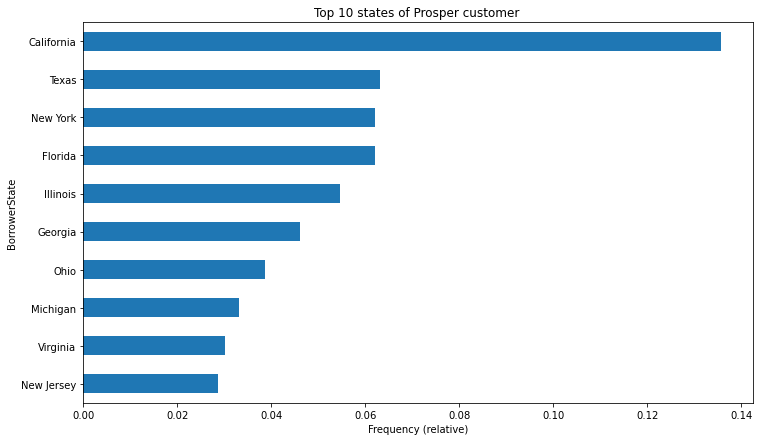

In [129]:
plt.figure(figsize=(12,7))
loan_df['BorrowerState'].value_counts(normalize=True)[:10].sort_values().plot(kind='barh')
plt.title('Top 10 states of Prosper customer ')
plt.xlabel('Frequency (relative)')
plt.ylabel('BorrowerState')
plt.show()

observation

The state with the highest number of prosper customer is Califonia

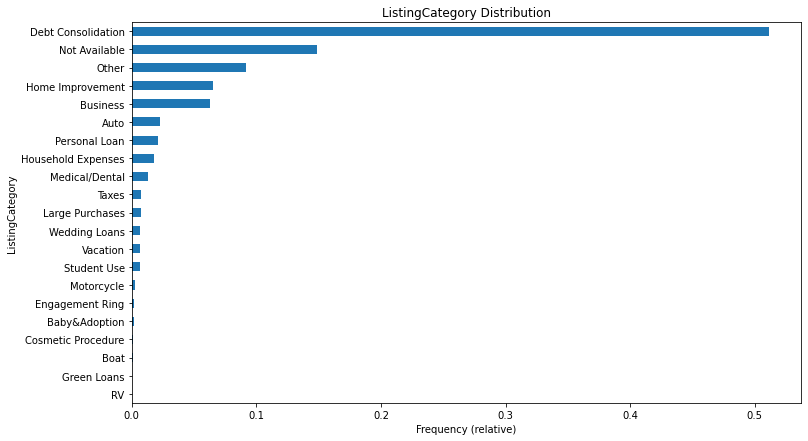

In [130]:
gnerate_countplot('ListingCategory', title ='ListingCategory Distribution', xlabel= 'Frequency (relative)',
                 ylabel= 'ListingCategory')

observation:
    
50% of loans gotten from Prosper are for Debt consolidation..People also borrow loan to pay Tax

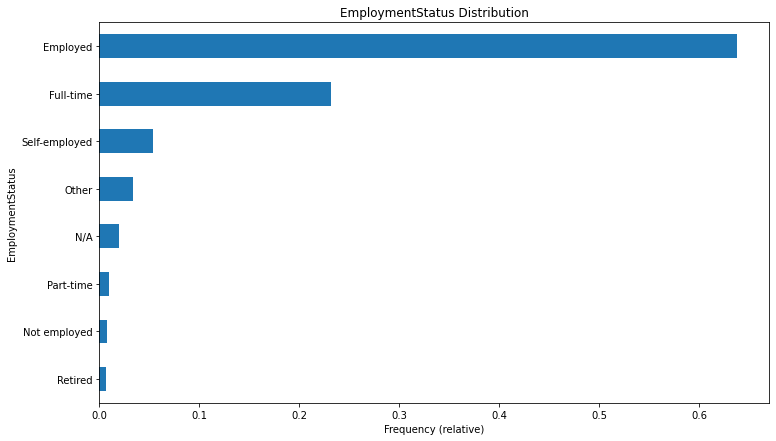

In [131]:
gnerate_countplot('EmploymentStatus', title ='EmploymentStatus Distribution', xlabel= 'Frequency (relative)',
                 ylabel= 'EmploymentStatus')

observation

Over 60 percent of prosper customer are employed


# observation 

10% of peosper customer get loan in Jan compared to other month

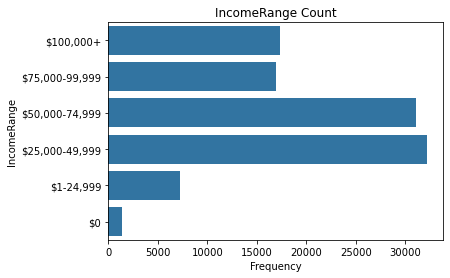

In [132]:
sb.countplot(y='IncomeRange', data=loan_df, color=base_color)

plt.title('IncomeRange Count')
plt.xlabel('Frequency')
plt.ylabel('IncomeRange')
plt.show()

observation

people with income range of $25,000-49,999 are the ones who are taking loans most

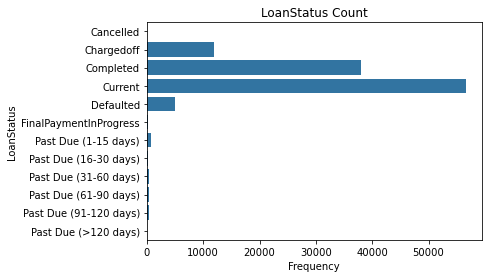

In [133]:
sb.countplot(y='LoanStatus', data=loan_df, color=base_color)

plt.title('LoanStatus Count')
plt.xlabel('Frequency')
plt.ylabel('LoanStatus')
plt.show()

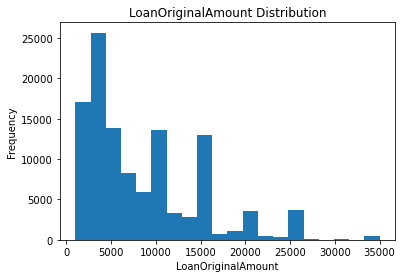

In [134]:
loan_df['LoanOriginalAmount'].plot(kind='hist', bins=20)
plt.title('LoanOriginalAmount Distribution')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Frequency')
plt.show()

# Observation
Most of the loan amount given out is between 1000 and 15000, with peak in 20000 and 25000

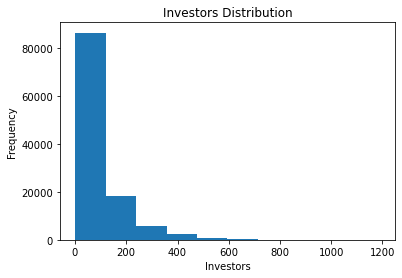

In [135]:
loan_df['Investors'].plot(kind='hist', bins=10)
plt.title('Investors Distribution')
plt.xlabel('Investors')
plt.ylabel('Frequency')
plt.show()

# Most of the investor that contibute towards loan are between 0 and 200

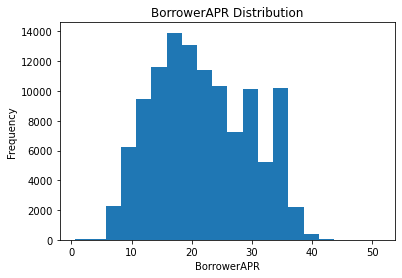

In [136]:
(loan_df['BorrowerAPR']*100).plot(kind='hist', bins=20)#, bins=np.arange(loan_df['BorrowerAPR'].min(), loan_df['BorrowerAPR'].max() + 0.2, step=0.2))
#plt.xscale('log')
plt.title('BorrowerAPR Distribution')
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency')
plt.show()

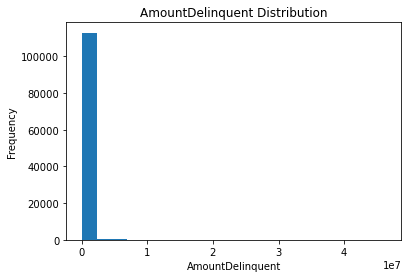

In [137]:
(loan_df['AmountDelinquent']*100).plot(kind='hist', bins=20)#, bins=np.arange(loan_df['BorrowerAPR'].min(), loan_df['BorrowerAPR'].max() + 0.2, step=0.2))
#plt.xscale('log')
plt.title('AmountDelinquent Distribution')
plt.xlabel('AmountDelinquent')
plt.ylabel('Frequency')
plt.show()

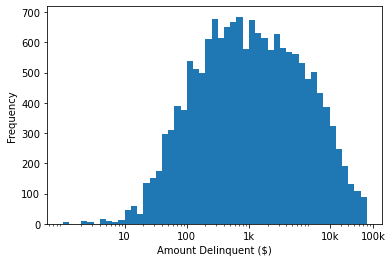

In [138]:
loan_df['AmountDelinquent'].plot(kind='hist', bins= 10 ** np.arange(0,5, 0.1))#, bins=np.arange(loan_df['BorrowerAPR'].min(), loan_df['BorrowerAPR'].max() + 0.2, step=0.2))
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 2e4, 1e5], ['10', '100', '1k', '10k', '100k'])
plt.xlabel('Amount Delinquent ($)')
plt.ylabel('Frequency')
plt.show()

# observation

The Borrower's Annual Percentage Rate (APR) for loan is normally distributed with peak arou 15 persecent. 

# UNIVARIATE OBSERVATION


1.50% of loans gotten from Prosper are for Debt consolidation..People also borrow loan to pay Tax


2. Prosper has more completed loans than defaulted loans 


3. People with income range of $25,000-49,999 are the ones who are taking loans most

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Borrower's Annual Percentage Rate (APR) is normally distributed. Loan amount is rightly skewed with Most of the loan amount given out is between 1000 and 15000, with peak in 20000 and 25000. 

> 50% of loans gotten from Prosper are for Debt consolidation..People also borrow loan to pay Tax

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did the log transformation to Amount Delinquent column to undersand the distribution.

## BIVARIATE

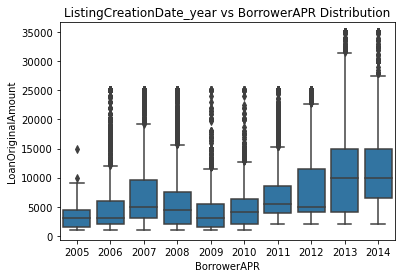

In [139]:
sb.boxplot(y='LoanOriginalAmount', x= 'ListingCreationDate_year', data=loan_df, color=base_color)
plt.title('ListingCreationDate_year vs BorrowerAPR Distribution')
plt.xlabel('BorrowerAPR')
plt.ylabel('LoanOriginalAmount')
plt.show()

# observation

Loan amount increases as the year increase 

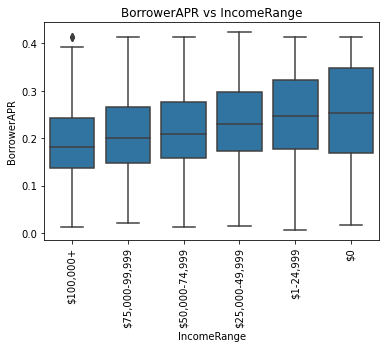

In [140]:
sb.boxplot(x='IncomeRange', y='BorrowerAPR', data=loan_df, color=base_color)
plt.xticks(rotation=90)
plt.title('BorrowerAPR vs IncomeRange')
plt.xlabel('IncomeRange')
plt.ylabel('BorrowerAPR')
plt.show();

# observation 

The higher the customer's salary the lower the BorrowerAPR

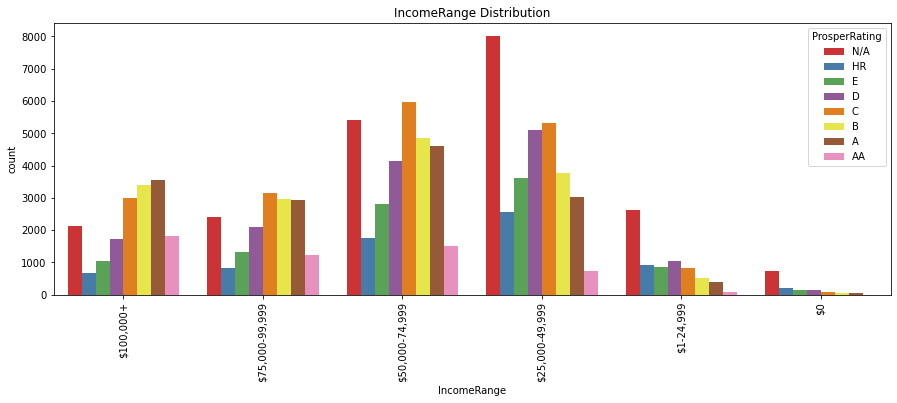

In [141]:
plt.figure(figsize=(15,5))
sb.countplot(x='IncomeRange', hue='ProsperRating', data=loan_df, palette="Set1")
plt.xticks(rotation=90)
plt.title('IncomeRange Distribution')
plt.xlabel('IncomeRange')
plt.show();

observation

based of custmoer income range, Most of the customer has C prosper rating 

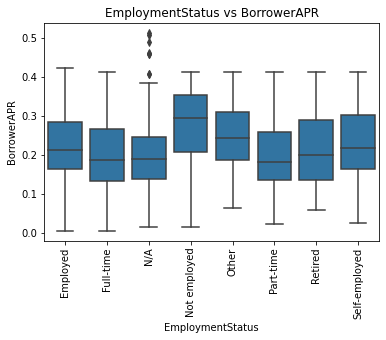

In [156]:
sb.boxplot(x='EmploymentStatus', y='BorrowerAPR', data=loan_df, color=base_color)
plt.xticks(rotation=90)
plt.title('EmploymentStatus vs BorrowerAPR')
plt.xlabel('EmploymentStatus')
plt.show();

observation

Customer that are unenployed or doesn't state their employment status get high BorrowerAPR 

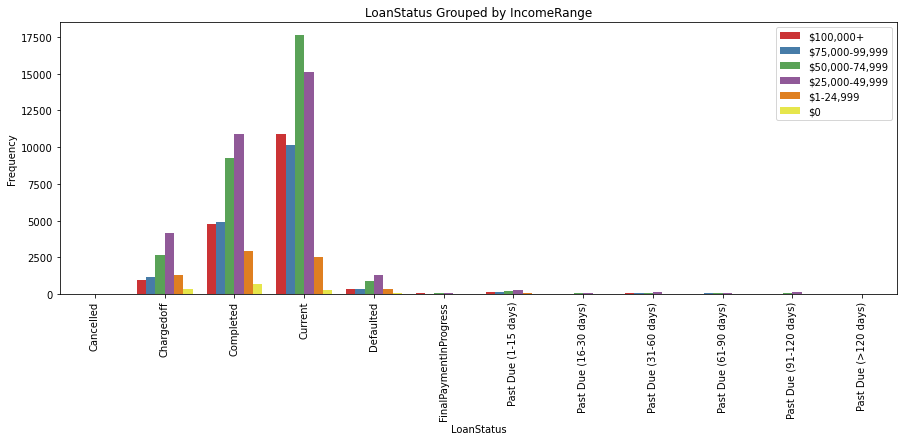

In [159]:
plt.figure(figsize=(15,5))
sb.countplot(x='LoanStatus', hue='IncomeRange', data=loan_df, palette="Set1")
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.title('LoanStatus Grouped by IncomeRange')
plt.xlabel('LoanStatus')
plt.ylabel('Frequency')
plt.show();

observations : customers whose salary is netwwen $25000 and $49999 are the one that charge off and default loan the most.
    
    

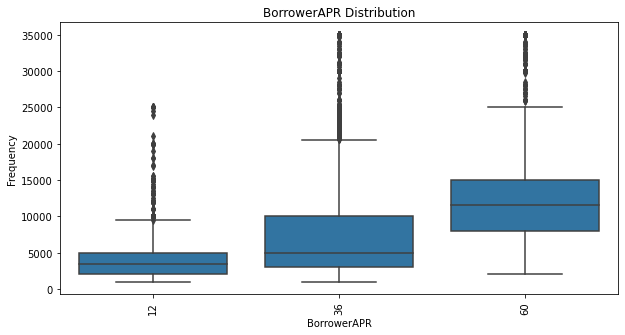

In [144]:
plt.figure(figsize=(10, 5))
sb.boxplot(x='Term', y='LoanOriginalAmount', data=loan_df, color=base_color)
plt.xticks(rotation=90)
plt.title('BorrowerAPR Distribution')
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency')
plt.show();

observation: It can be observed that the bigger thr loan amount the term the bigger 

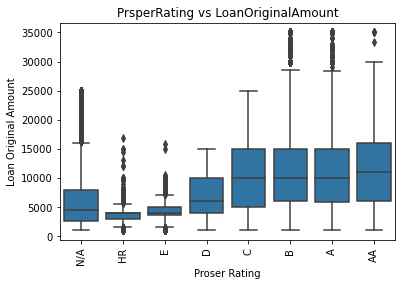

In [162]:
sb.boxplot(x='ProsperRating', y='LoanOriginalAmount', data=loan_df, color=base_color)
plt.xticks(rotation=90)
plt.title('PrsperRating vs LoanOriginalAmount')
plt.xlabel('Proser Rating')
plt.ylabel('Loan Original Amount')
plt.show();

observation 
Customer with good rating get high loan

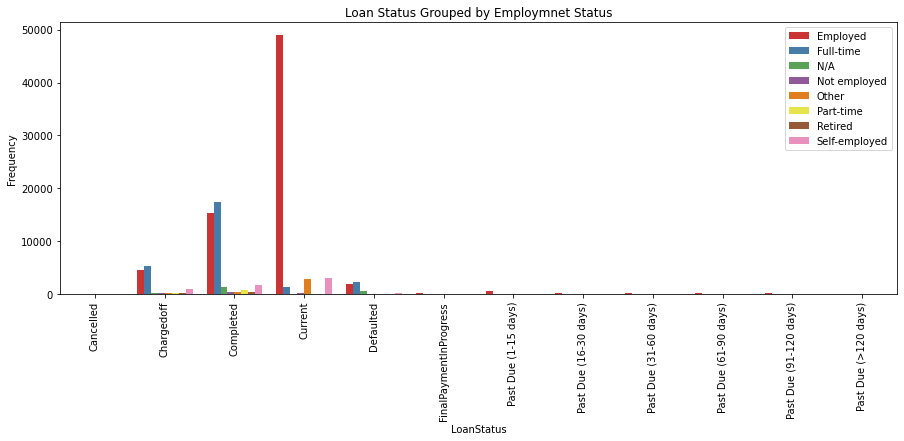

In [164]:
plt.figure(figsize=(15,5))
sb.countplot(x='LoanStatus', hue='EmploymentStatus', data=loan_df, palette="Set1")
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.title('Loan Status Grouped by Employmnet Status')
plt.xlabel('LoanStatus')
plt.ylabel('Frequency')
plt.show();

Observation

Prosper customers that are employed have the higest running loan, followed by customer whose emplymnt status is not mentioned.

It also worth noting yhat customer that are full-time emplyed defaulted than every other customers

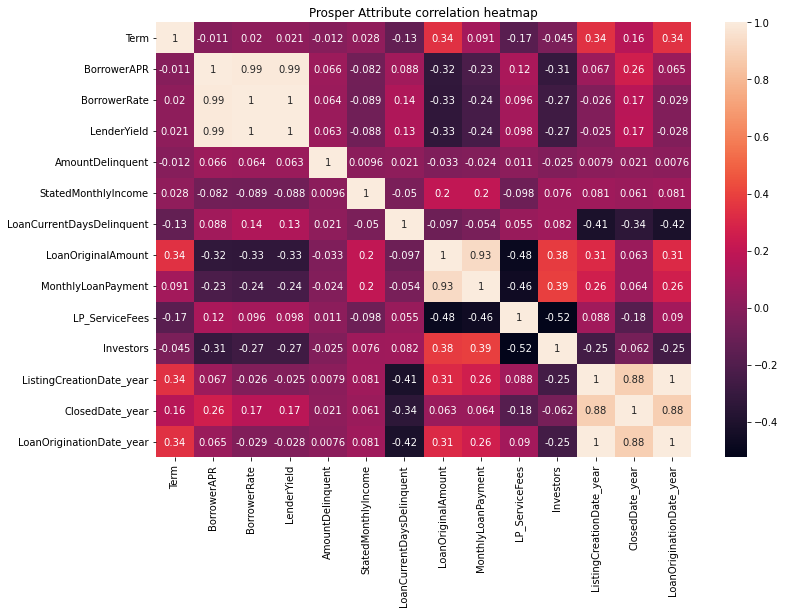

In [165]:
plt.figure(figsize=(12,8))
sb.heatmap(loan_df.corr(), annot=True)
plt.title('Prosper Attribute correlation heatmap')
plt.show();

observation

as salary range decreases BorrowerAPR increases

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The higher the customer's salary the lower the BorrowerAPR

> There is a moderate relationship netween BorrowerAPR and closing year. moderate relationship alo exist between loan amount and stated monthly salary

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> CustomerS with good prosper rating get high loan amount

> Customers whose salary is betwwen  25000𝑎𝑛𝑑 49999 are the one that charge off and default loan the most.

## MULTIVARIATE

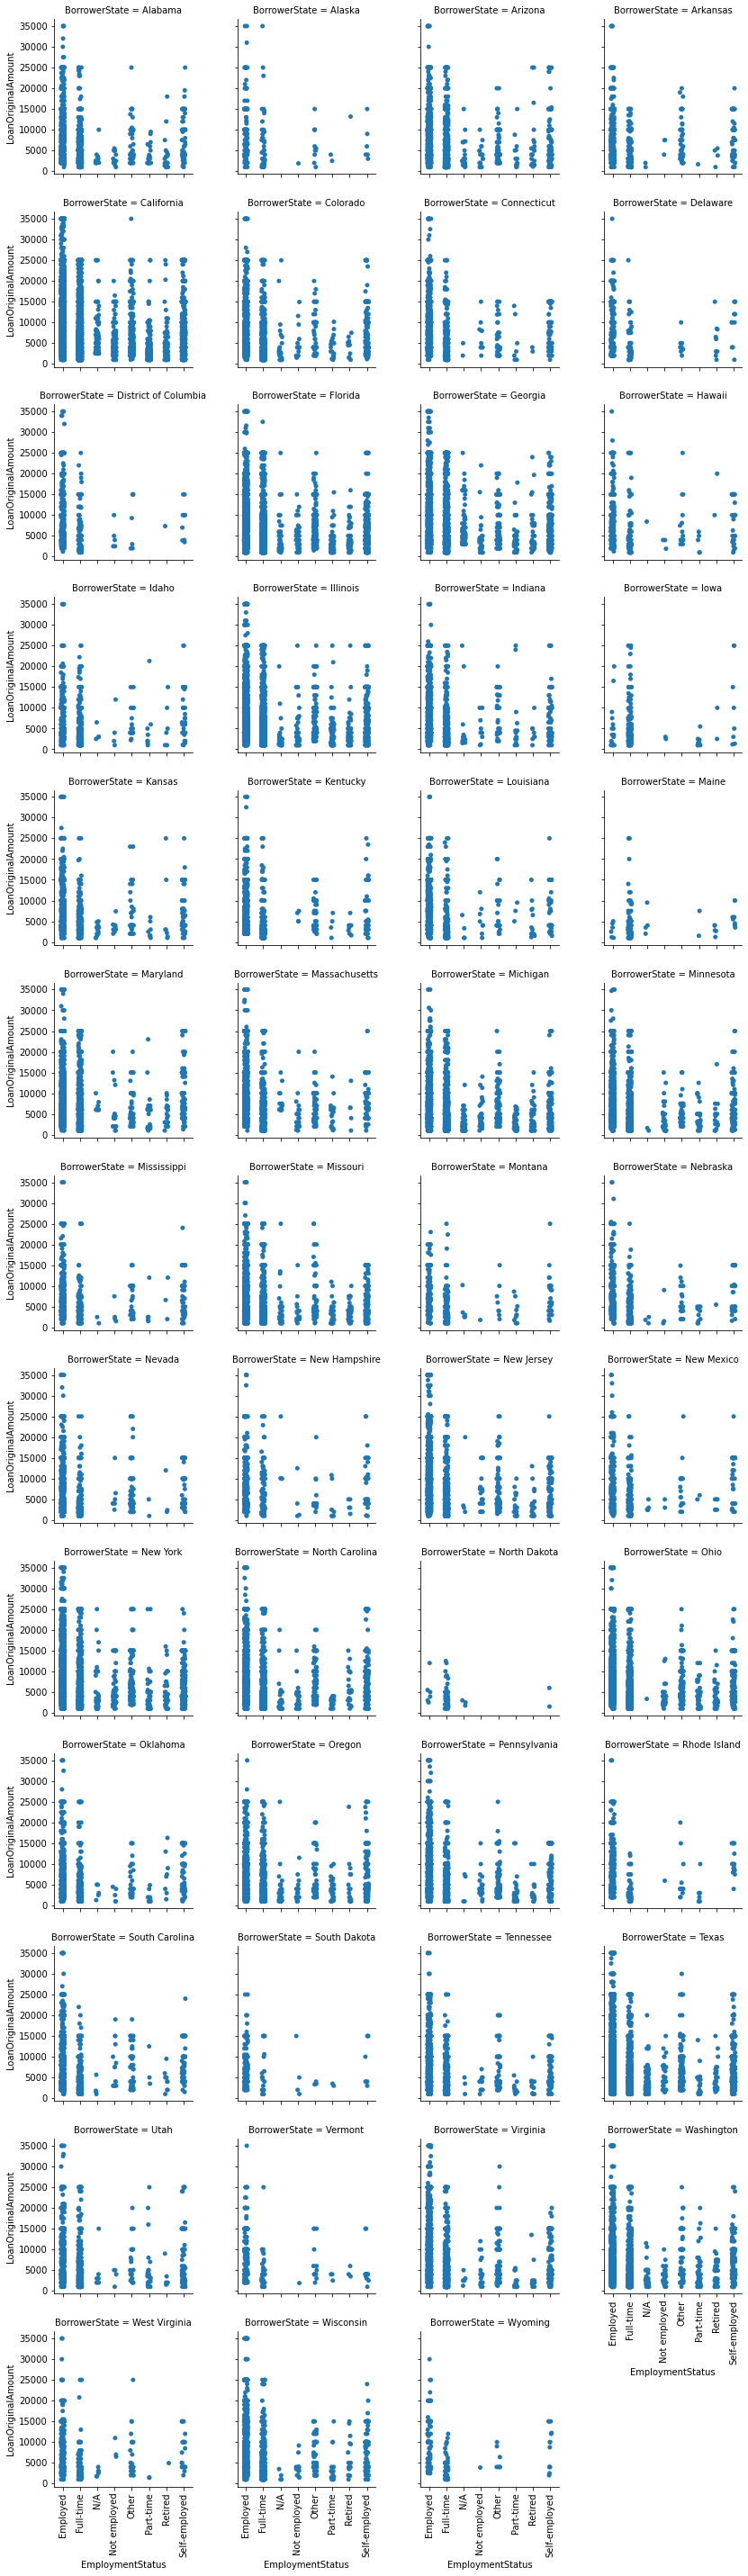

In [147]:
g = sb.FacetGrid(data = loan_df, col = 'BorrowerState', col_wrap = 4, size = 3)
g.map(sb.stripplot, 'EmploymentStatus', 'LoanOriginalAmount')
g.set_xticklabels(rotation=90);

# observation

There are state e.g Delaware, Alaska , South Dakota where loan are not given to customer without employment status 

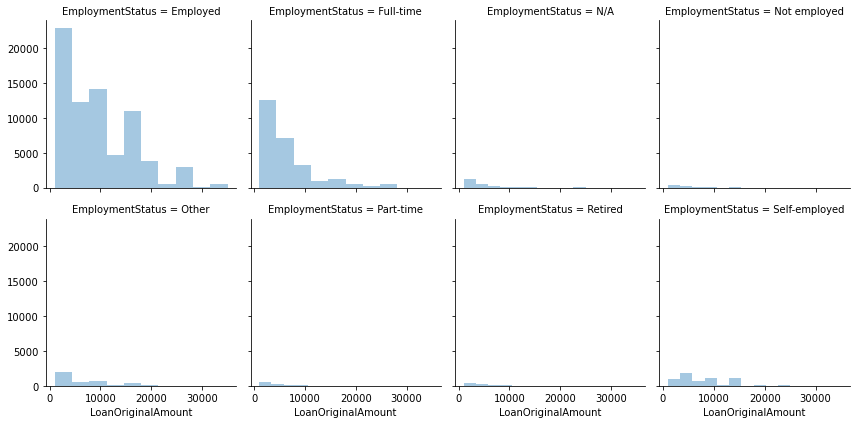

In [152]:
g = sb.FacetGrid(data = loan_df, col = 'EmploymentStatus', col_wrap = 4, size = 3)
g.map(sb.distplot, 'LoanOriginalAmount', bins = 10, kde=False);

observation

Customers that have part time employment status loan get loan than customer that are self employed, meaning prosper takes into consideration consistence source of income

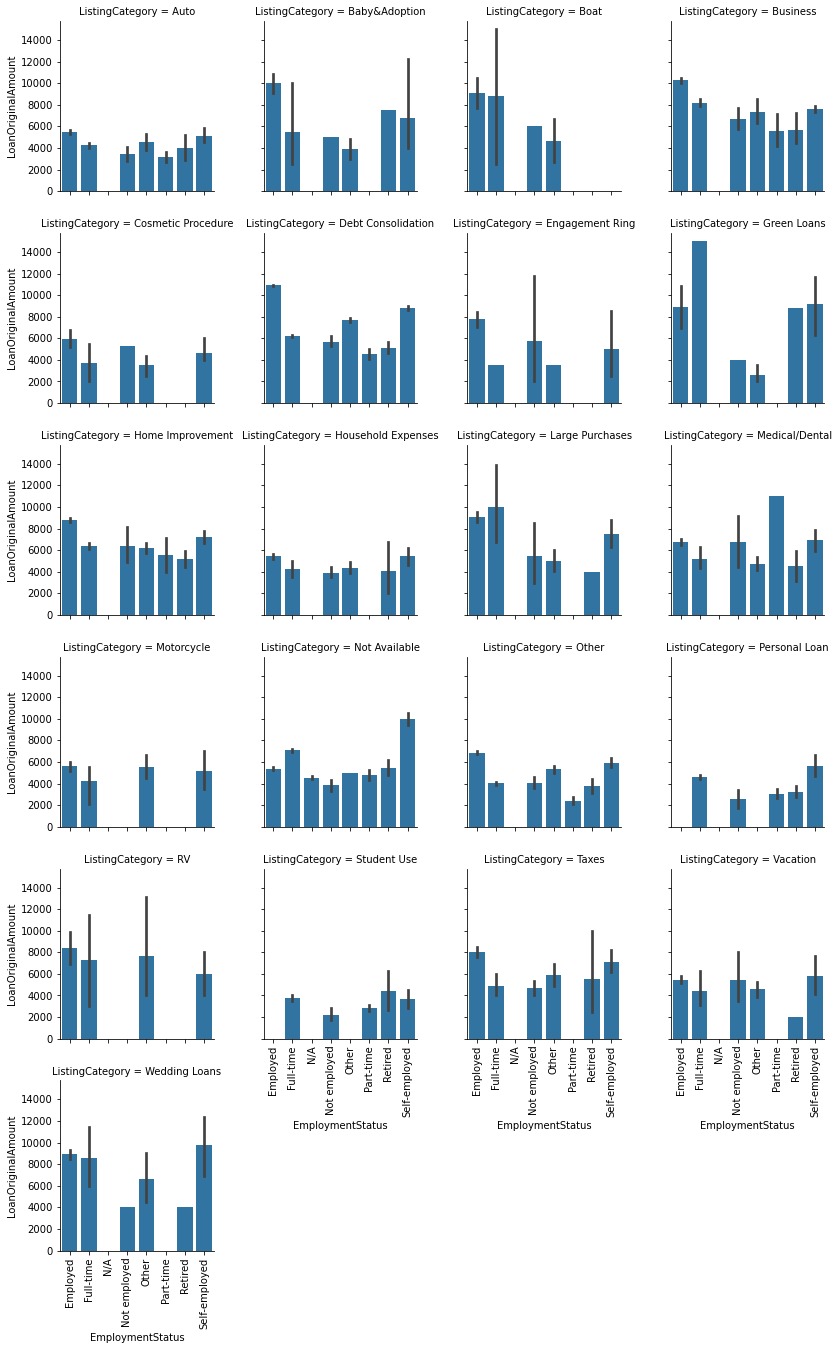

In [149]:
g = sb.FacetGrid(data = loan_df, col = 'ListingCategory', col_wrap = 4, size = 3)
g.map(sb.barplot, 'EmploymentStatus', 'LoanOriginalAmount')
g.set_xticklabels(rotation=90);

# observation 

Retired customer get loan for student use (probably for their children) than other customer

Part time customer get loan for Medical/Dental than other customer maybe beacuse they are partime employee of the organization and are not entitle to health insurance benefit

# MULTIVARIATE OBSERVATION

1.Retired customer get loan for student use th(probably for their children) than other customer

2. Customers that has part time employment status loan get loan than customer that are self employed.

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
There are state e.g Delaware, Alaska , South Dakota swhere loan are not given to customer without employment status 

Were there any interesting or surprising interactions between features?
Retired customer get loan for student use th(probably for their children) than other customer

Customers that has part time employment status loan get loan than customer that are self employed.

# 𝐶𝑜𝑛𝑐𝑙𝑢𝑠𝑖𝑜𝑛 

Inorder to investigate the dataset, I cleaned the data, added new feature to the data (feature engineering) and also compared attributes in the dataset with each other.

My major findings are:

The average loan amount is 8337.01385

The higher the customer's salary the lower the BorrowerAPR

There is a moderate relationship netween BorrowerAPR and closing year. moderate relationship alo exist between loan amount and stated monthly salary

Retired customer get loan for student use th(probably for their children) than other customer

Limitation: Finding the best way to handle the missing age, incase I would like to build a predictive model and removing dataset would like lead to loss of information for the model



In [150]:
loan_df.to_csv('cleanprosper.csv', index=False)